In [17]:
%matplotlib inline

from pycocotools.coco import COCO
import numpy as np
import os
import cv2
import matplotlib
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
# img_path = "C:\\Users\\danie\\"
# json_path = "../../data/COCO/annotations/instances_val2017.json"

img_path = "C:\\Users\\danie\\Downloads\\Bone_Mets_Manual_Segmentation\\images"
json_path = "C:\\Users\\danie\\Downloads\\Bone_Mets_Manual_Segmentation\\annotations\\instances_default.json"

In [3]:
def BGR2RGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [4]:
coco = COCO(json_path)

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


In [5]:
# Category IDs.
cat_ids = coco.getCatIds()
print(f"Number of Unique Categories: {len(cat_ids)}")
print("Category IDs:")
print(cat_ids, "\n")  # The IDs are not necessarily consecutive.

Number of Unique Categories: 4
Category IDs:
[1, 2, 3, 4] 



In [6]:
# All categories.
cats = coco.loadCats(cat_ids)
cat_names = [cat["name"] for cat in cats]
print("Categories Names:")
print(cat_names, "\n")

Categories Names:
['Vessel', 'Tumor cell', 'NG2', 'Ki-67'] 



In [7]:
# Category ID -> Category Name Example
query_id = cat_ids[1]
query_annotation = coco.loadCats([query_id])[0]
query_name = query_annotation["name"]
query_supercategory = query_annotation["supercategory"]
print("Category ID -> Category Name:")
print(
    f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}\n"
)

Category ID -> Category Name:
Category ID: 2, Category Name: Tumor cell, Supercategory: 



In [8]:
# Category Name -> Category ID.
query_name = cat_names[1]
query_id = coco.getCatIds(catNms=[query_name])[0]
print("Category Name -> ID:")
print(f"Category Name: {query_name}, Category ID: {query_id}")

Category Name -> ID:
Category Name: Tumor cell, Category ID: 2


In [9]:
# Get the ID of all the images containing the object of the category.
img_ids = coco.getImgIds(catIds=[query_id])
print(f"Number of Images Containing {query_name}: {len(img_ids)}")

Number of Images Containing Tumor cell: 1


In [10]:
# Pick one image.
img_id = img_ids[0]
img_info = coco.loadImgs([img_id])[0]
img_file_name = img_info["file_name"]
img_url = img_info["coco_url"]
print(
    f"Image ID: {img_id}, File Name: {img_file_name}, Image URL: {img_url}"
)

Image ID: 2, File Name: 452-Ves-Tumor.png, Image URL: 


In [11]:
# Get all the annotations for the specified image.
ann_ids = coco.getAnnIds(imgIds=[img_id], iscrowd=None)
anns = coco.loadAnns(ann_ids)
print(f"Annotations for Image ID {img_id}:")
print(anns)

Annotations for Image ID 2:
[{'id': 1, 'image_id': 2, 'category_id': 2, 'segmentation': [[4483.0, 980.8, 4476.4, 974.4, 4472.0, 967.6, 4461.9, 964.8, 4459.5, 953.4, 4464.2, 947.8, 4473.8, 944.0, 4477.17, 935.01, 4485.71, 937.29, 4491.97, 943.55, 4498.1, 944.9, 4510.0, 956.4, 4511.1, 962.7, 4503.8, 966.5, 4507.35, 973.15, 4501.65, 979.99, 4494.82, 974.29]], 'area': 1421.0, 'bbox': [4459.5, 935.01, 51.6, 45.79], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 2, 'category_id': 2, 'segmentation': [[5207.32, 1765.36, 5201.59, 1765.36, 5196.22, 1764.64, 5191.2, 1767.54, 5188.69, 1772.52, 5185.83, 1777.18, 5183.68, 1782.2, 5181.17, 1787.21, 5178.3, 1791.87, 5175.08, 1796.53, 5172.21, 1801.19, 5170.06, 1806.21, 5172.93, 1810.86, 5178.66, 1811.26, 5184.39, 1811.26, 5189.77, 1809.79, 5195.14, 1812.66, 5199.08, 1808.71, 5198.73, 1803.34, 5203.74, 1800.47, 5209.12, 1798.72, 5211.62, 1793.66, 5211.62, 1787.93, 5215.21, 1783.63, 5217.0, 1778.26, 5215.21, 1772.88, 5212.34, 17

C:\Users\danie\Downloads\Bone_Mets_Manual_Segmentation\images
(3300, 6480, 3)


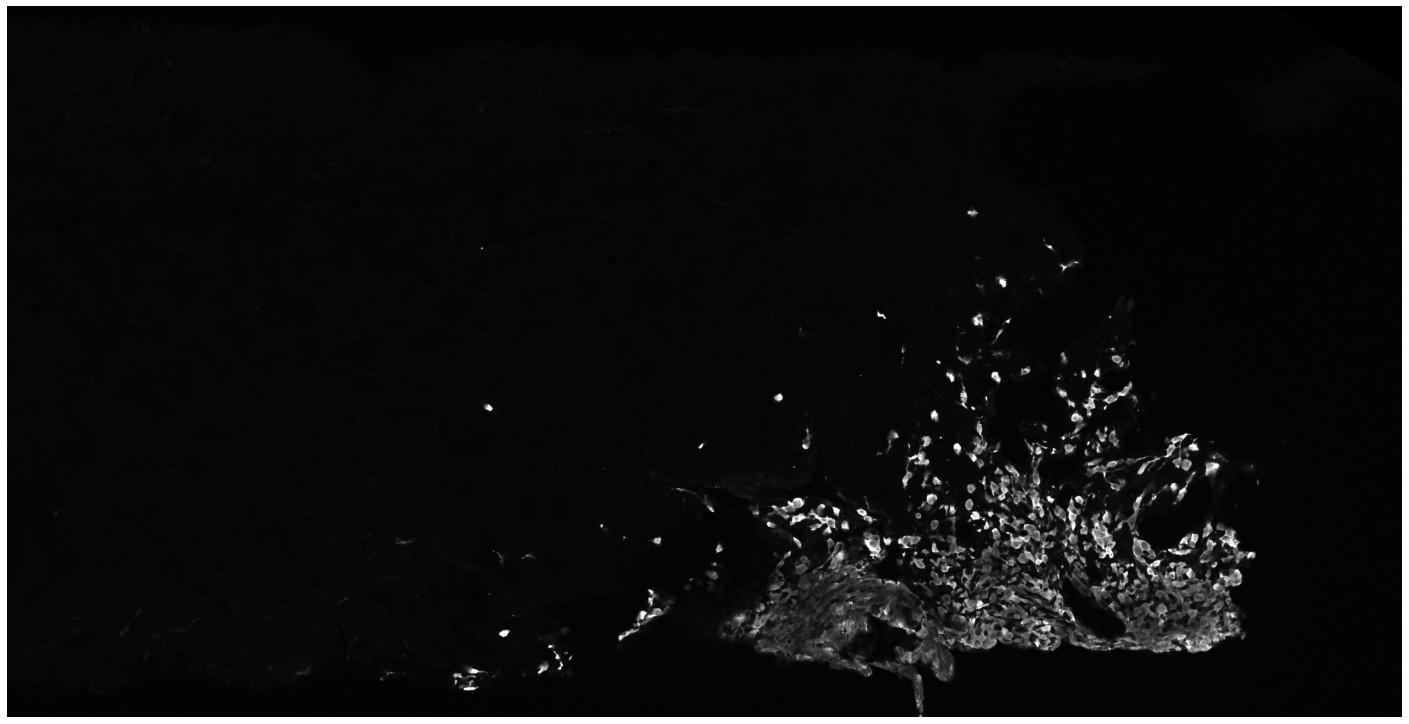

In [12]:
# Use URL to load image.
import cv2
import requests
im = cv2.imread(os.path.join(img_path, img_file_name))

print(img_path)
print(im.shape)

plt.figure(figsize=(25,25))
plt.axis("off")
plt.imshow(BGR2RGB(im))

# coco.showAnns(anns)

In [13]:
im.shape

(3300, 6480, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


float64
float64 0.0 2.0
float32 0.0 2.0


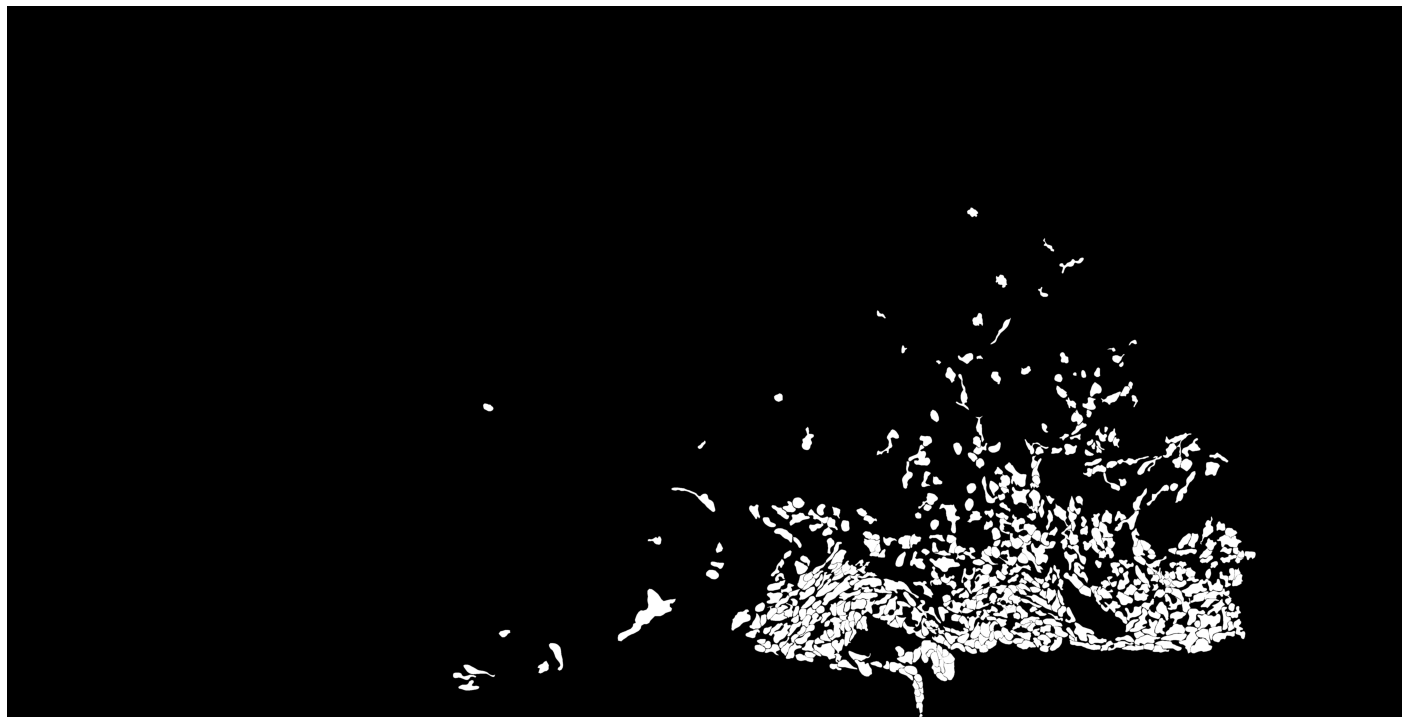

In [14]:
height = im.shape[0]
width = im.shape[1]

mask = np.zeros((height, width))

for ann in tqdm(anns):
    mask = np.maximum(mask, coco.annToMask(ann)*ann["category_id"])
    
plt.figure(figsize=(25,25))
plt.axis("off")
print(mask.dtype)
plt.imshow(BGR2RGB(np.float32(mask)))

print(mask.dtype, np.min(mask), np.max(mask))
print(np.float32(mask).dtype, np.min(np.float32(mask)), np.max(np.float32(mask)))

In [15]:
set(mask.flatten().tolist())

{0.0, 2.0}

In [16]:
n = "/home/dkermany/data/COCO/masks/000000397133.png"
m = "/home/dkermany/data/COCO/val2017/000000397133.jpg"
img = cv2.imread(n)
mimg = cv2.imread(m)

plt.figure(figsize=(25,25))
plt.imshow(BGR2RGB(mimg))

plt.figure(figsize=(25,25))
# plt.imshow(BGR2RGB(img))
plt.imshow(BGR2RGB(img*25))

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


<Figure size 1800x1800 with 0 Axes>

In [ ]:
set(img.flatten().tolist())